In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [4]:
X = iris["data"]
y = iris["target"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [11]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(20, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [12]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                   validation_data=(X_test, y_test),
                   batch_size=32)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.2927 - loss: 1.2684 - val_accuracy: 0.3947 - val_loss: 1.1432
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3000 - loss: 1.1682 - val_accuracy: 0.4211 - val_loss: 1.0705
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4318 - loss: 1.0840 - val_accuracy: 0.6842 - val_loss: 1.0113
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6879 - loss: 1.0164 - val_accuracy: 0.7368 - val_loss: 0.9819
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6924 - loss: 0.9789 - val_accuracy: 0.6053 - val_loss: 0.9560
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6241 - loss: 0.9514 - val_accuracy: 0.6053 - val_loss: 0.9300
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6243 - loss: 0.9335 - val_accuracy: 0.7368 - val_loss: 0.9018
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7357 - loss: 0.8990 - val_accuracy: 0.7368 - val_loss: 0.8758

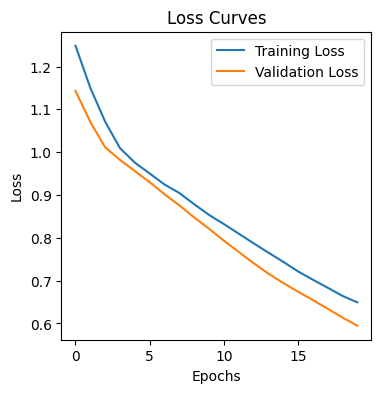

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
import numpy as np
test_input = np.array([[1,2,3,4]])
sample_output = model.predict(test_input)
sample_output = np.argmax(sample_output)
print(sample_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2


In [22]:
model.save("iris_classifier.keras")

In [24]:
import tensorflow as tf
model = tf.keras.models.load_model("iris_classifier.keras")